## Standard Normal Distribution
### Learning Objectives:
By the end of this module, you should be able to:

- Define normal distribution
- Define Z-scores / the standard normal distribution
- Explain how normal distribution matters within the fields of statistics and Data Science

In the past few lessons, we have been studying distributions and learning how to describe them through both terminology and calculations.  A key focus has been determining if a distribution is normal, or in what ways it may deviate from a normal distribution.  

## What Is Normal Distribution?
The normal distribution is a symmetrical probability distribution with the mean (average) at the center. It is without skew. Data closest to the average occurs more frequently/is more probable than data farthest from the average. In graph form, the normal distribution will appear as a bell-shaped curve. In a normal distribution, the mean, median, and mode are equal.

### Standard Normal Distribution / Z-Scores
Z scores are sometimes called "standard scores."The z score transformation is especially useful when seeking to compare the relative standings of items from distributions with different means and/or different standard deviations. Z scores are especially informative when the distribution to which they refer is normal. In every normal distribution, the distance between the mean and a given Z score cuts off a fixed proportion of the total area under the curve. 

- After we convert a normal distribution to z-scores, we refer to it as the standard normal distribution.

### Properties of the Standard Normal Distribution
- Once we have a standard normal distribution, we know exactly what percentage of the data should fall within a specific region of our distribution.

- For a normal distribution:

    - 34.1% of the distribution will fall between the mean and 1 standard deviation above the mean and 34.1% will fall 1 standard deviation below the mean.
        - This means that 68.2% of the distribution falls within mean +/- 1 std (z-score between -1 and 1)
    - We also know 13.6 % of the distribution falls between +1 std and +2 std and between -1 std and -2 std 
        - This means that 95.4% of the distribution falls within 2 standard deviations (z score between -2 and 2)
- An important fact to remember:
    - Only 2.3% of the distribution falls above and only 2.3% of the distribution falls below 2 standard deviations.
    - This fact will become very important when we discuss sampling and p-values.

## Calculating Z-Scores with Python
We will use the human height data set for this exploration

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Filter Males and Females

We wouldn't have to separate males and females, but for this lesson, we will just explore the distribution of female heights.

In [3]:
## Filtering out males and females to separate variables
males = df.loc[df['Gender']=='Male'].copy()
females = df.loc[df['Gender']=='Female'].copy()

In [4]:
# Check out the .head() for the female heights:

females['Height'].head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

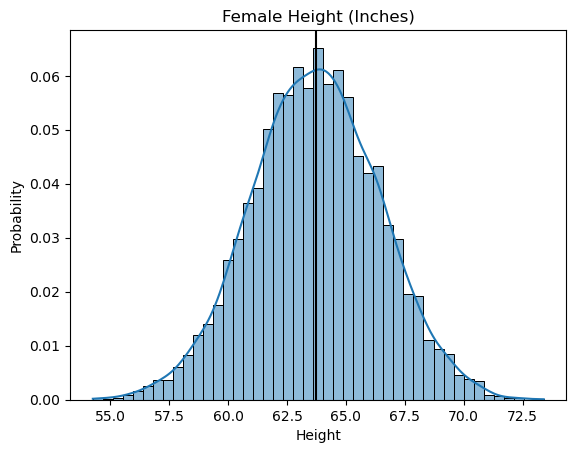

In [5]:
## Plot a histogram of probabilities for female height
ax = sns.histplot(x=females['Height'],stat='probability',kde=True)
ax.axvline(females['Height'].mean(), color='k')
ax.set_title("Female Height (Inches)");

#### Convert to Z-scores

We have several tools/ways of converting a feature to Z-scores.

We are going to demonstrate 3 ways :



In [6]:
## manually calc z-score conversion
mean = females["Height"].mean()
std = females["Height"].std()
z_scores_manual = (females['Height'] -  mean)/std
z_scores_manual.head(3)

5000   -1.779502
5001    0.564198
5002   -0.126014
Name: Height, dtype: float64

In [7]:
## Calculating z-scores with scipy.stats.zscore
z_scores_scipy = stats.zscore(females['Height'])
z_scores_scipy[0:3]

/var/folders/yt/hk1fgcjn4w16b997bctnz_kr0000gn/T/ipykernel_4239/62191943.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  z_scores_scipy[0:3]


5000   -1.779680
5001    0.564255
5002   -0.126027
Name: Height, dtype: float64

In [8]:
scaler = StandardScaler()
z_scores_scaler = scaler.fit_transform(females[['Height']])
z_scores_scaler[:3]

array([[-1.77967952],
       [ 0.56425475],
       [-0.12602672]])

### Plot distribution with z-scores



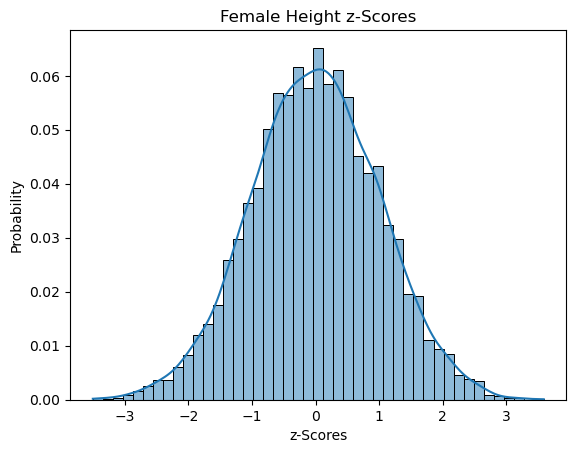

In [9]:
## Plot a histogram with z-scores
ax = sns.histplot(x=z_scores_manual,stat='probability',kde=True)
ax.set_xlabel("z-Scores")
ax.set_title("Female Height z-Scores");

## Summary
The normal distribution is the most commonly used distribution in statistics. It can be used to determine the proportion of data values that fall within a specified number of standard deviations from the mean. Data science revolves around the concepts of probability distributions, and the core of this concept is focused on Normal Distribution.  When the x-axis is z-scores, we consider this the "standard normal distribution," which makes understanding how likely a value is independent of the feature's units.   Now that we have concluded the lesson, it is worth revisiting this visual:

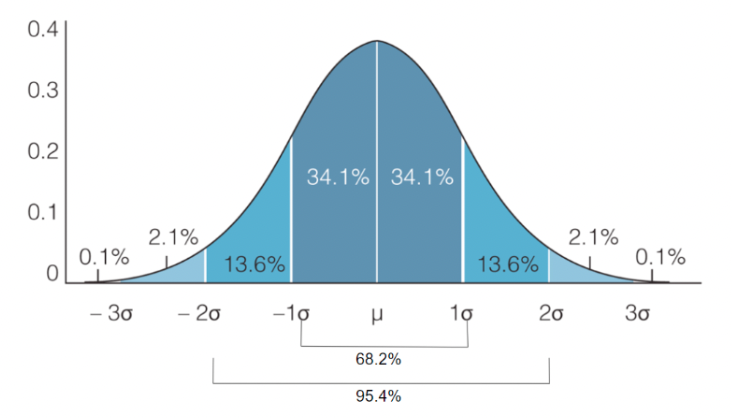